# **House Prices model**
<center><img src="https://thumbs.dreamstime.com/b/weinheim-germany-beautiful-architecture-bright-roofs-parks-top-view-wide-photo-weinheim-germany-beautiful-232080692.jpg" alt="drawing" width="800"/></center>

<center><img src="https://t3.ftcdn.net/jpg/04/87/13/32/360_F_487133202_AoYev86tqkqK6IsRjnuFWWsTbPDJtqJa.jpg" alt="drawing" width="200"/></center>

I'm really bad at spellings and at naming things. If it's objectinal to anybody then I'm really sorry.

### Formalities from kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<style>
h1 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
## Importing some packages 

The following two packages help a lot when it comes to creating and decorating a graph

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

## Import and check our csv file content

In [3]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

#### Briefing 
Make sure our original data stays in a untouched data frame for later use. Also, we want to edit test_data in oder to make all the columns match the train data. So, we will apply all the changes in test_data that we are applying on train data.

In [5]:
raw_data = data.copy()

raw_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<center><img src="https://media1.giphy.com/media/USUIWSteF8DJoc5Snd/giphy.gif?cid=ecf05e47ikz99xcs61ojmjnx7m15l5xle7c74wyprzrd6sgu&rid=giphy.gif&ct=g" alt="drawing" width="200"/></center>

Hmm... What's this '...' between our columns. Can it be that all our columns are not shown. Let's find out. 

In [6]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Indeed. Now lets set max columns to someting which is greater than the number of varibales. 

In [7]:
pd.set_option('display.max_columns', 1000)

raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive


Everything except for SalePrice in test_data because we are ment to predict it

<h3> More information </h3>
Lets gets some more information of what our data comprises of...

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
raw_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

<img src="https://1.bp.blogspot.com/-nzm908Pfunw/VqXgeRNp4LI/AAAAAAAACJI/wgeVntLSIT8/w1200-h630-p-k-no-nu/status-report.png" alt="drawing" width="400"/>

<h2> Summary </h2>

#### 1) Types of data here are 
    * Numerical data
    * Categorical data
 
#### 2) There are outliers

#### 3) There are null values as well

<h2> Data exploration </h2> 

#### Numerical data
 * Make histograms 
 * Make distplots
 * Check for multicollinearity and outliers
 
#### Categorical data 
 * Make bar charts
 * Figure out how to convert it into proper numerical form so that we can use it for our model

In [12]:
# To seperate numeric columns 
raw_data.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
raw_data = raw_data.drop("Id", axis=1)

num_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

target = raw_data.SalePrice

data_num = raw_data[num_columns]

data_cat = raw_data.drop(num_columns, axis=1)

Ik that SalePrice shouldn't be at num_columns but it is for some specific graphs. I swear I'll drop it when the time comes.😅

In [14]:
test_id = test_data.Id
test_data = test_data.drop("Id", axis=1)

num_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']



test_data_num = test_data[num_columns]

test_data_cat = raw_data.drop(num_columns, axis=1)

I have created an id dataframe to store id seperately as we need it according tothe sample_submission shown.

#### Histogram of numerical variables

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


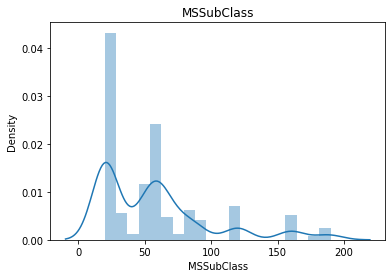

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


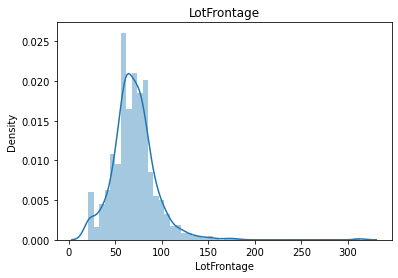

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


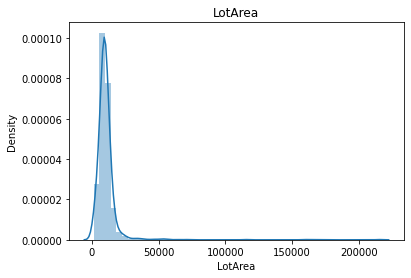

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


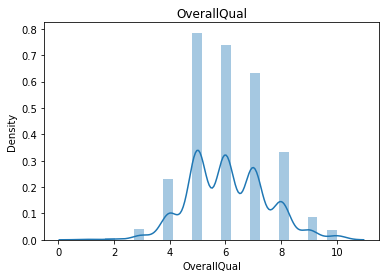

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


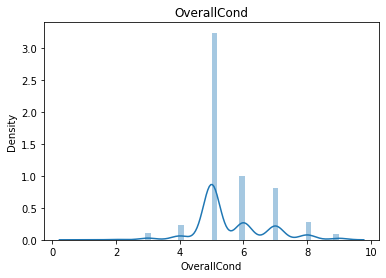

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


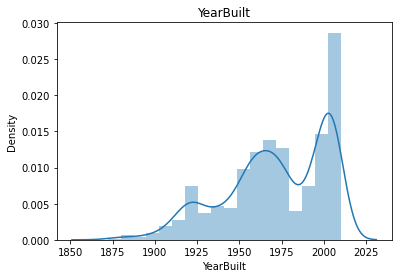

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


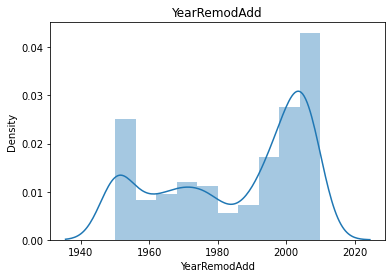

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


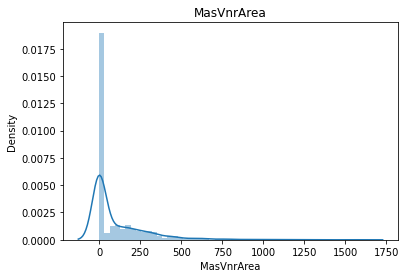

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


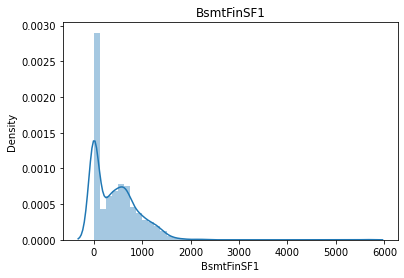

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


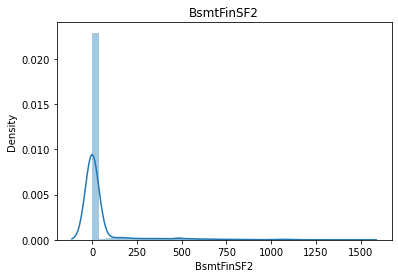

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


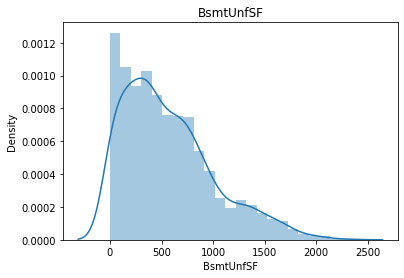

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


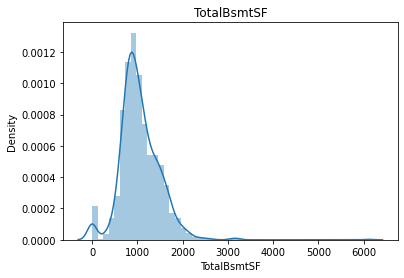

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


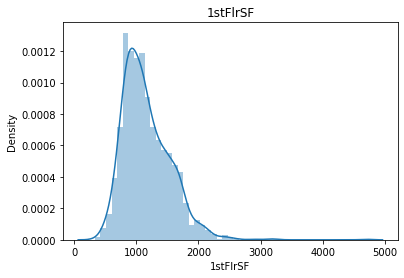

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


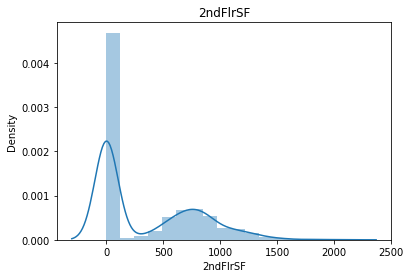

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


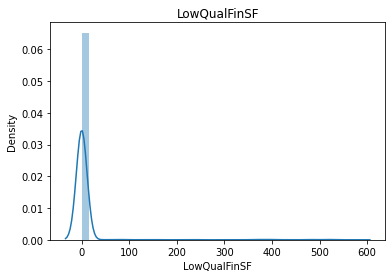

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


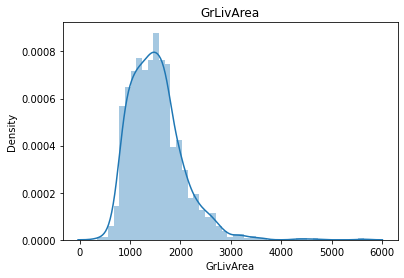

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


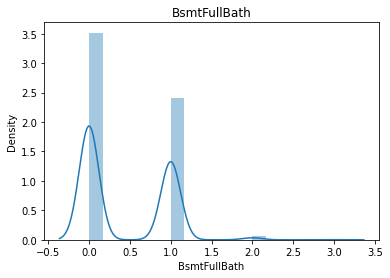

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


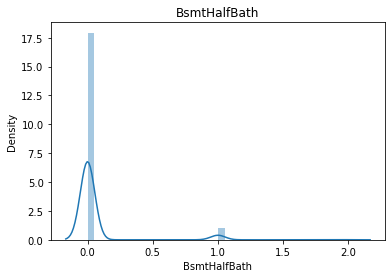

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


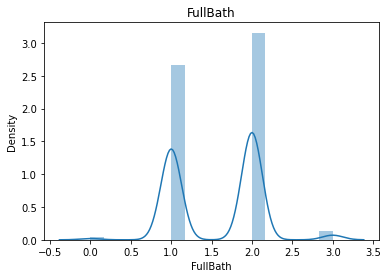

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


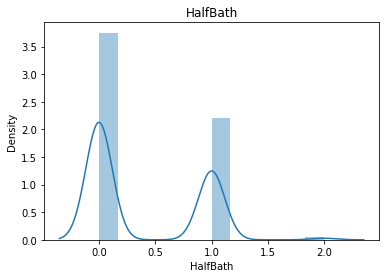

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


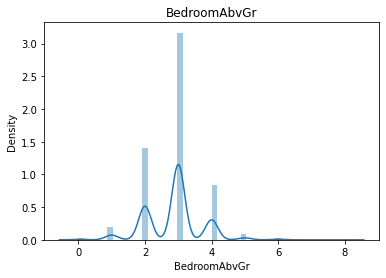

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


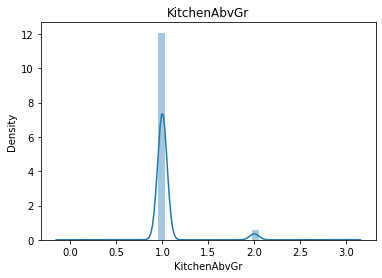

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


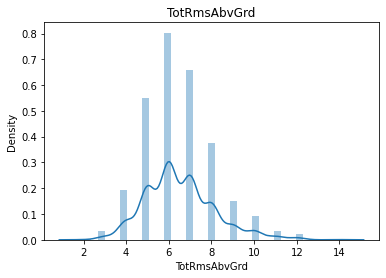

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


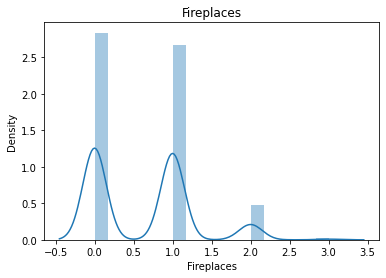

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


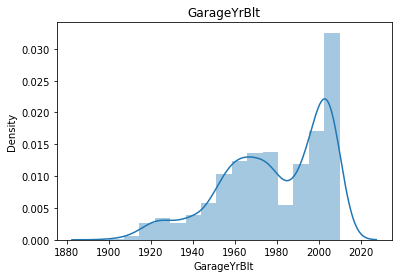

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


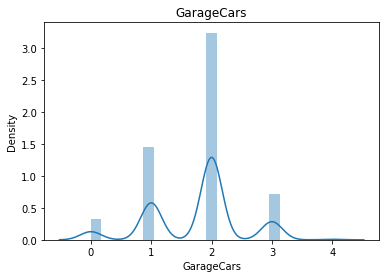

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


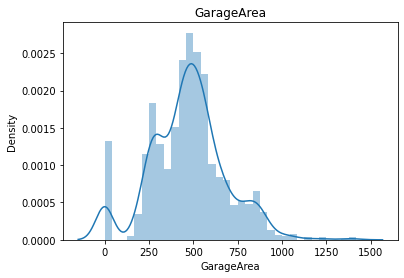

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


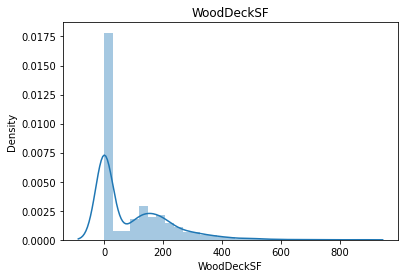

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


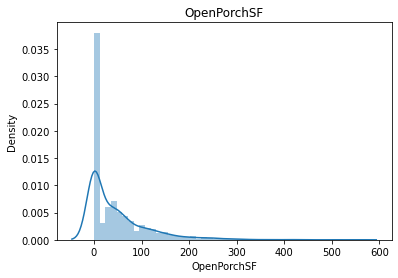

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


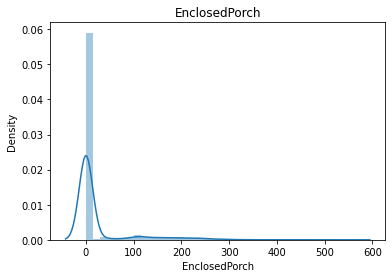

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


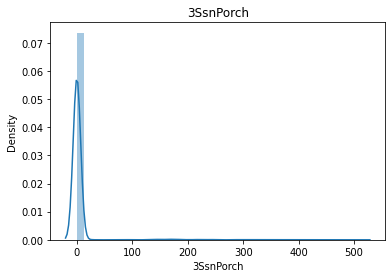

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


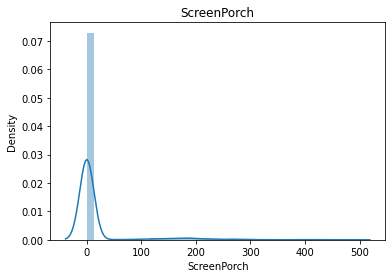

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


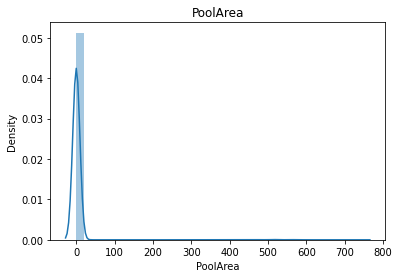

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


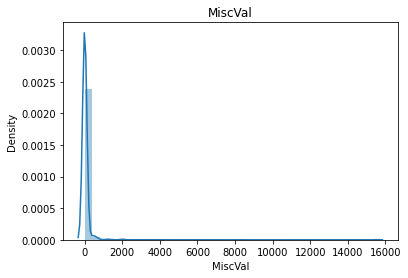

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


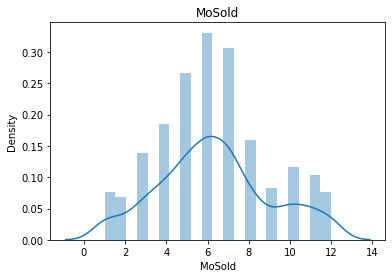

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


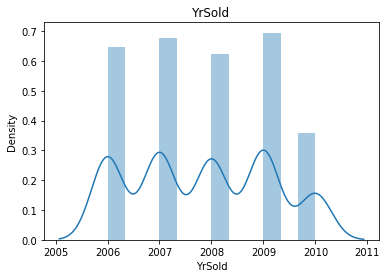

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


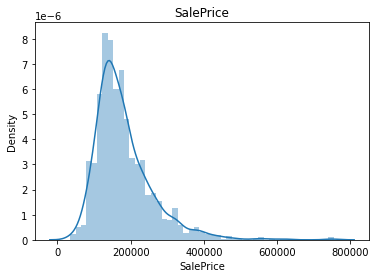

In [15]:
import plotly.express as px

for i in data_num.columns:
    sns.distplot(data_num[i])
    plt.title(i)
    plt.show()

We would prefer normalising some of these variables.

#### Check the relationship of the variables with target(SalesPrice)

By the definitions of the features mentioned GrLivArea and  looks like a strong variable in determining the house prices

Text(0.5, 1.0, 'y-> SalePrice, x->TotalBsmtSF')

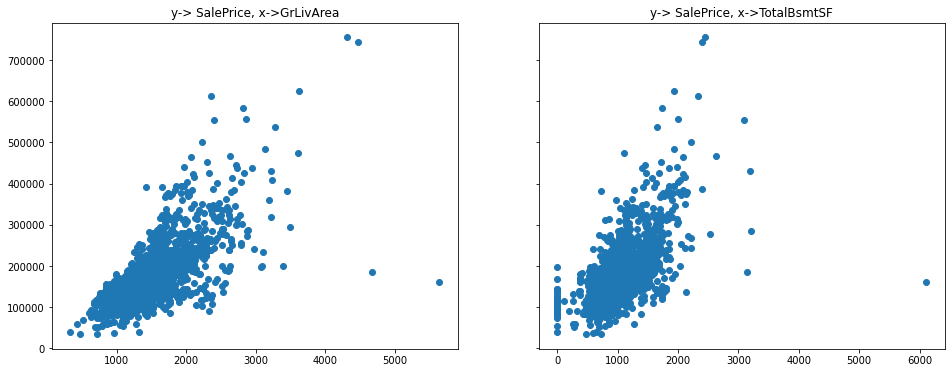

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,6))
ax1.scatter(data_num['GrLivArea'],target)
ax1.set_title("y-> SalePrice, x->GrLivArea")
ax2.scatter(data_num['TotalBsmtSF'],target)
ax2.set_title("y-> SalePrice, x->TotalBsmtSF")

### Now lets check multicollinearity of variables using heatmaps

<AxesSubplot:>

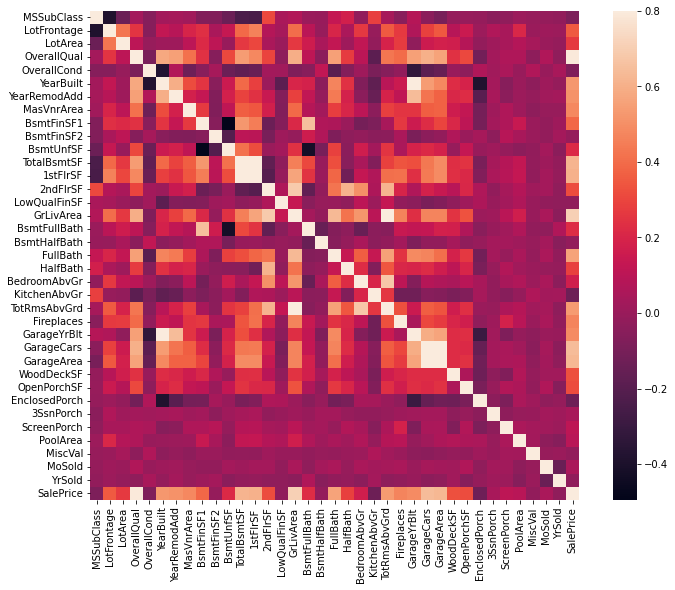

In [17]:
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<center><img src="https://media1.giphy.com/media/PacQUjx7vwEBJLszzc/giphy.gif?cid=ecf05e47i99m7003gcofti8vmypk9qqp9a86ez2suw5n643q&rid=giphy.gif&ct=g" alt="drawing" width="200"/></center>

It's a lot to get something meaningful out of it. Let's narrow it down a bit filtering only 10 variables in which the largets amount of multi-collinearity is observed. 

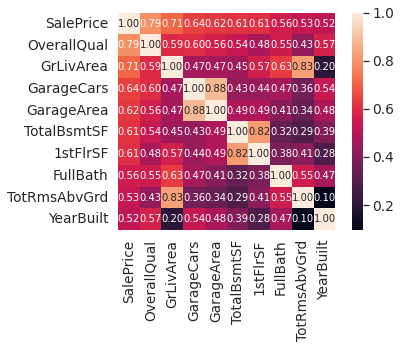

In [18]:
corrmat2 = data_num.corr()
k = 10
cols = corrmat2.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_num[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### What's going on?

We can notice that GargeCars and GarageArea are correlated which is kinda obvious. More the area, more the number of cars you can park into it. Beside that TotalBsmtSF and 1stFlrSF are correlated. A possible explanation to this maybe that the area on which house is built(basement) will be the area used to build the 1st floor. But in that case, GrLivArea should have correlated with these two features which is supprisingly not the case. Lastly,GrLivArea and TotalRmsAbvGrd is again proportional because area should be proportional to the number of rooms. 

Just to get a better idea of these features let plot some graphs.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


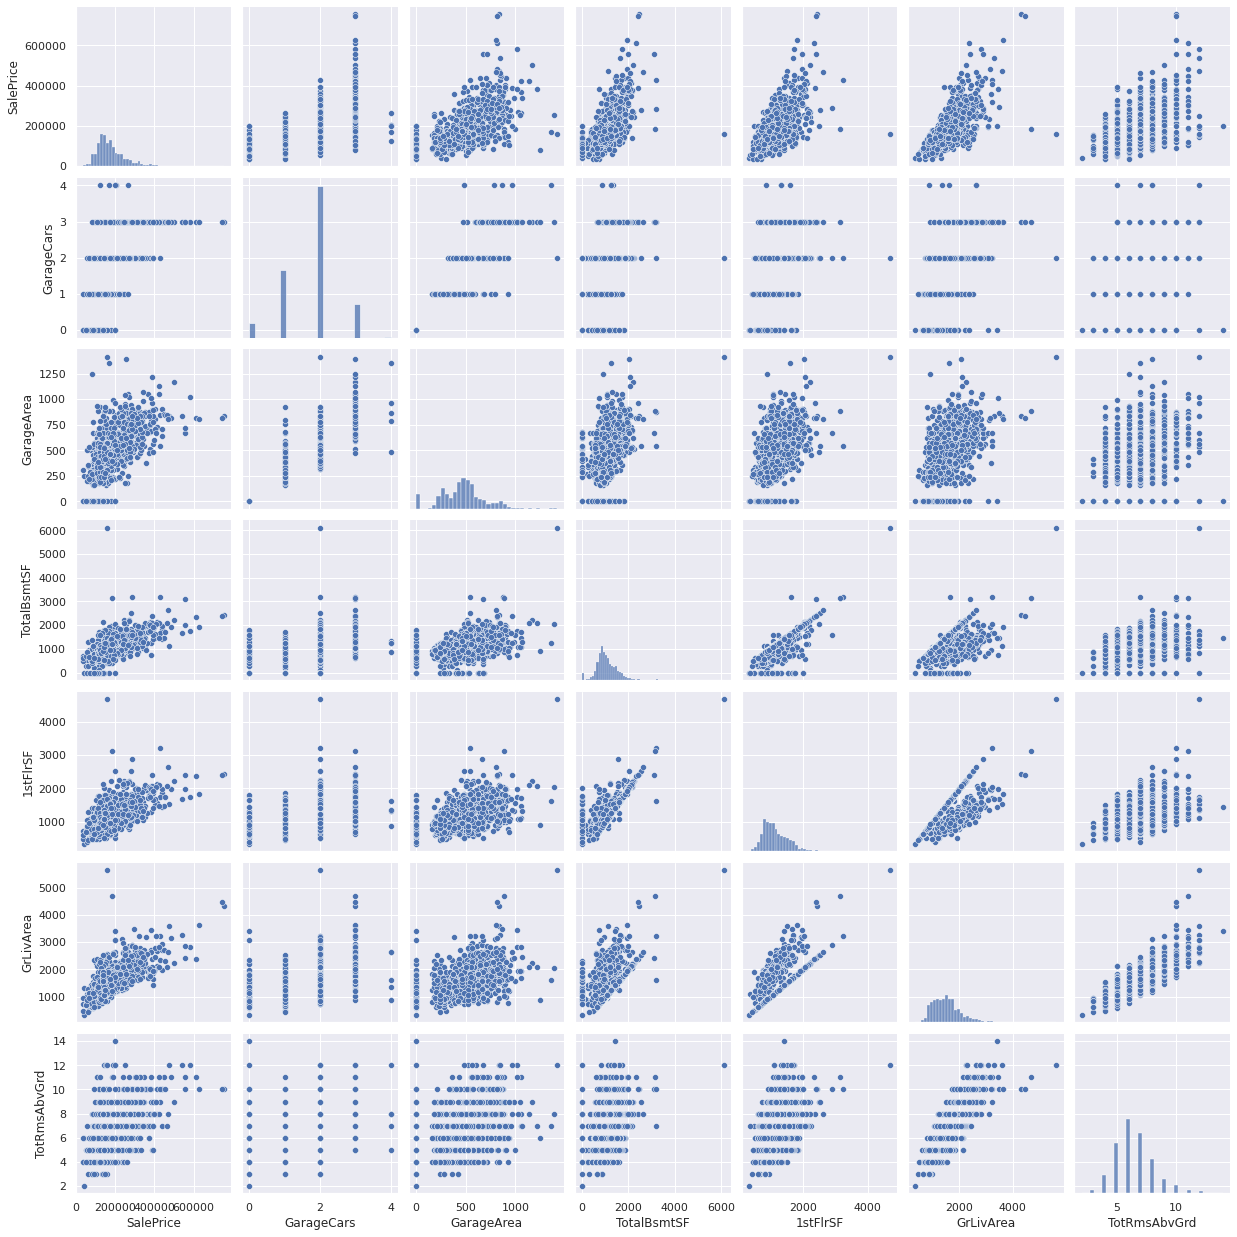

In [19]:
sns.set()
cols = ['SalePrice', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd']
sns.pairplot(data_num[cols], size = 2.5)
plt.show();

I should have scaled the features for the graphs to be exact but this is for a rough visualization. So, this will do for now.

### Dealing with missing values

**PoolQC**:- data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [20]:
raw_data["PoolQC"] = raw_data["PoolQC"].fillna("None")

**MiscFeature**:- data description says NA means "no misc feature"

In [21]:
raw_data["MiscFeature"] = raw_data["MiscFeature"].fillna("None")

**Alley** :- data description says NA means "no alley access"

In [22]:
raw_data["Alley"] = raw_data["Alley"].fillna("None")

**Fence**:- data description says NA means "no fence"

In [23]:
raw_data["Fence"] = raw_data["Fence"].fillna("None")

**FireplaceQu**:- data description says NA means "no fireplace"

In [24]:
raw_data["FireplaceQu"] = raw_data["FireplaceQu"].fillna("None")

**GarageType, GarageFinish, GarageQual and GarageCond**:- Replacing missing data with None. Assuming there are no garages

In [25]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    raw_data[col] = raw_data[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars**:- Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [26]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    raw_data[col] = raw_data[col].fillna(0)

**LotFrontage**:- Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [27]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
raw_data["LotFrontage"] = raw_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath**:- missing values are likely zero for having no basement

In [28]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    raw_data[col] = raw_data[col].fillna(0)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**:- For all these categorical basement-related features, NaN means that there is no basement.

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
   raw_data[col] = raw_data[col].fillna('None')

**MasVnrArea and MasVnrType**:- NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [30]:
raw_data["MasVnrType"] = raw_data["MasVnrType"].fillna("None")
raw_data["MasVnrArea"] = raw_data["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)**:- 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [31]:
raw_data['MSZoning'] =raw_data['MSZoning'].fillna(raw_data['MSZoning'].mode()[0])

**Utilities**:- For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [32]:
raw_data = raw_data.drop(['Utilities'], axis=1)

**Functional**:- data description says NA means typical

In [33]:
raw_data["Functional"] = raw_data["Functional"].fillna("Typ")

**Electrical**:- It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [34]:
raw_data['Electrical'] = raw_data['Electrical'].fillna(raw_data['Electrical'].mode()[0])

**KitchenQual**:- Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [35]:
raw_data['KitchenQual'] = raw_data['KitchenQual'].fillna(raw_data['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd**:- Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [36]:
raw_data['Exterior1st'] = raw_data['Exterior1st'].fillna(raw_data['Exterior1st'].mode()[0])
raw_data['Exterior2nd'] = raw_data['Exterior2nd'].fillna(raw_data['Exterior2nd'].mode()[0])

**SaleType**:- Fill in again with most frequent which is "WD"

In [37]:
raw_data['SaleType'] = raw_data['SaleType'].fillna(raw_data['SaleType'].mode()[0])

**MSSubClass**:- Na most likely means No building class. We can replace missing values with None

In [38]:
raw_data['MSSubClass'] = raw_data['MSSubClass'].fillna("None")

Is that all? Lets check...

In [39]:
raw_data.isnull().sum().max()

0

All that for test_data dataframe

In [40]:
test_data["PoolQC"] = test_data["PoolQC"].fillna("None")
test_data["MiscFeature"] = test_data["MiscFeature"].fillna("None")
test_data["Alley"] = test_data["Alley"].fillna("None")
test_data["Fence"] = test_data["Fence"].fillna("None")
test_data["FireplaceQu"] = test_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test_data[col] = test_data[col].fillna(0)
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform( lambda x: x.fillna(x.median()))
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test_data[col] = test_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
   test_data[col] = test_data[col].fillna('None')
test_data["MasVnrType"] = test_data["MasVnrType"].fillna("None")
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)
test_data['MSZoning'] =test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data = test_data.drop(['Utilities'], axis=1)
test_data["Functional"] = test_data["Functional"].fillna("Typ")
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['MSSubClass'] = test_data['MSSubClass'].fillna("None")

test_data.isnull().sum().max()

0

### Dealing with outliers

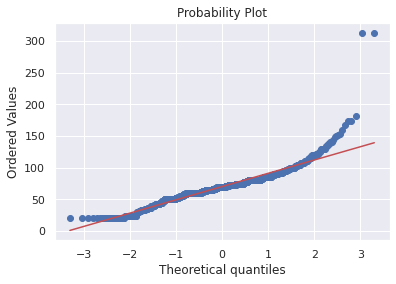

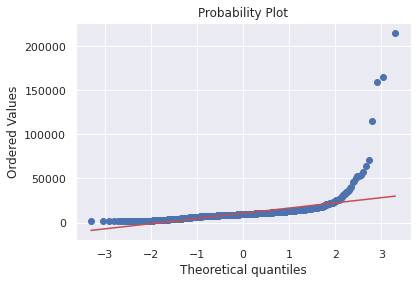

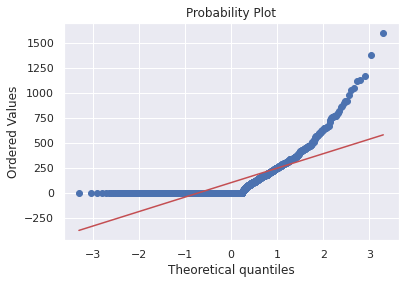

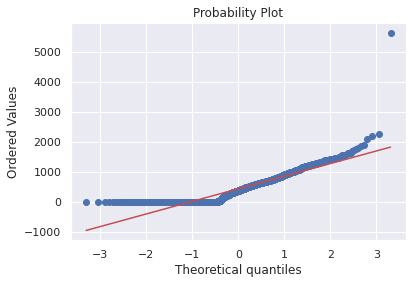

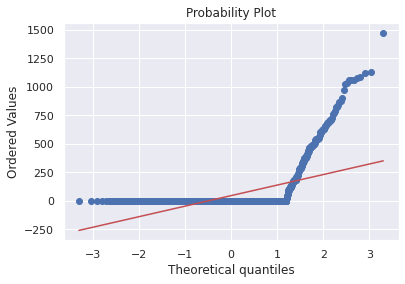

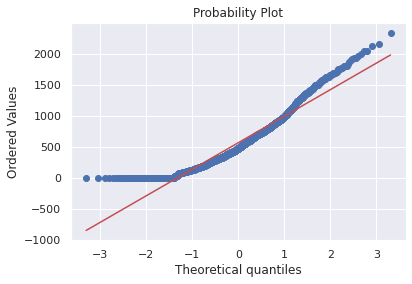

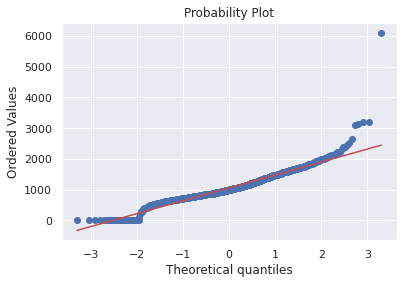

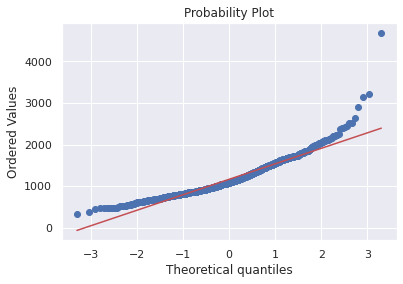

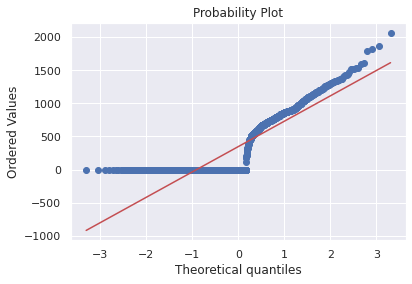

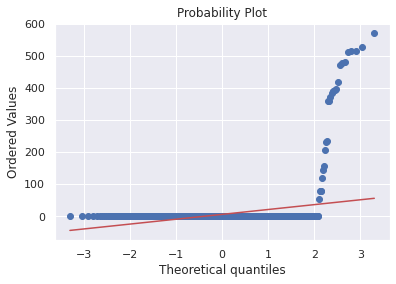

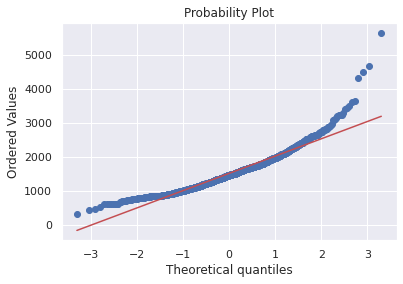

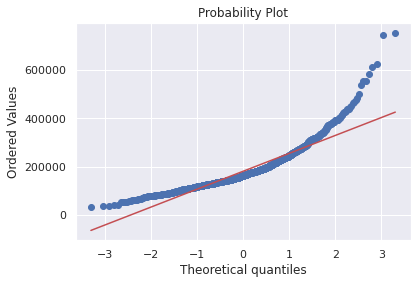

In [41]:
# data_num.columns
from scipy import stats

outlier_cols = [ 'LotFrontage', 'LotArea',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'SalePrice']



#sns.distplot(raw_data["SalePrice"], fit=stats.norm)
#plt.show()
for i in outlier_cols:
    fig = plt.figure()
    res = stats.probplot(raw_data[i], plot=plt)
    fig.show()

All the graphs here suggest they need to be arranged normally to maintain the normality of the distribution and reduce h

<center><img src="https://media4.giphy.com/media/B0uJ6d5OXb50k/giphy.gif?cid=ecf05e476oofx4e07zi9eyb9bkeyevypzjc5gi0o01iwfehm&rid=giphy.gif&ct=g" alt="drawing" width="200"/></center>

Lets make sure that no value in outlier_cols touch zero... because we are about to use log transform to remove outliers

In [42]:
for i in outlier_cols:
    fig = px.histogram(raw_data, x=i)
    fig.show()

In [43]:
redefined_cols = [ 'LotFrontage', 'LotArea', '1stFlrSF', 
       'GrLivArea', 'SalePrice']

unloged_data = raw_data.copy()

raw_data[redefined_cols] = np.log1p(raw_data[redefined_cols])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



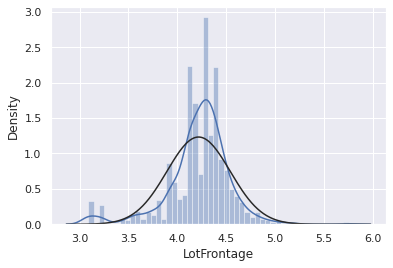

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



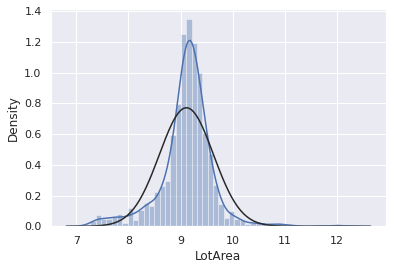

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



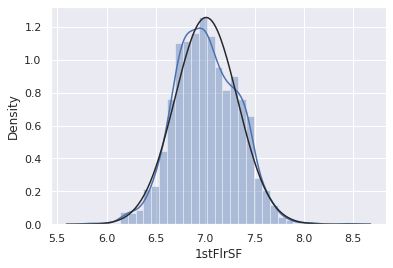

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



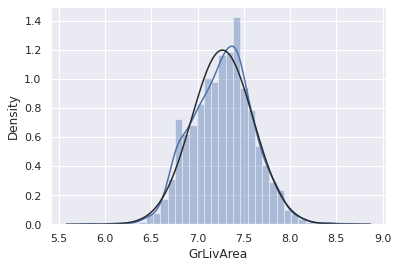

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



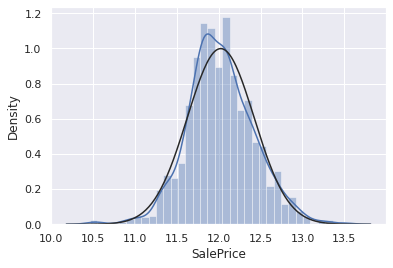

In [44]:
for i in redefined_cols:
    sns.distplot(raw_data[i] , fit=stats.norm)
    plt.show()


Log transformation for test_data

In [45]:
test_redefined_cols = [ 'LotFrontage', 'LotArea', '1stFlrSF', 
       'GrLivArea']

test_data[test_redefined_cols] = np.log1p(test_data[test_redefined_cols])

Just to check if there are any infinite values.

In [46]:
pd.set_option('display.max_rows', None)
np.isfinite(raw_data.all())

MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
Street           True
Alley            True
LotShape         True
LandContour      True
LotConfig        True
LandSlope        True
Neighborhood     True
Condition1       True
Condition2       True
BldgType         True
HouseStyle       True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
RoofStyle        True
RoofMatl         True
Exterior1st      True
Exterior2nd      True
MasVnrType       True
MasVnrArea       True
ExterQual        True
ExterCond        True
Foundation       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1       True
BsmtFinType2     True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
Heating          True
HeatingQC        True
CentralAir       True
Electrical       True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBa

In [47]:
pd.set_option('display.max_rows', None)
np.isfinite(test_data.all())

MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
Street           True
Alley            True
LotShape         True
LandContour      True
LotConfig        True
LandSlope        True
Neighborhood     True
Condition1       True
Condition2       True
BldgType         True
HouseStyle       True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
RoofStyle        True
RoofMatl         True
Exterior1st      True
Exterior2nd      True
MasVnrType       True
MasVnrArea       True
ExterQual        True
ExterCond        True
Foundation       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1       True
BsmtFinType2     True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
Heating          True
HeatingQC        True
CentralAir       True
Electrical       True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBa

### Categorical values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



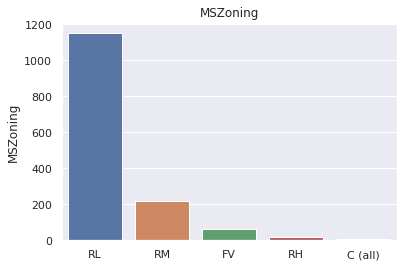

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



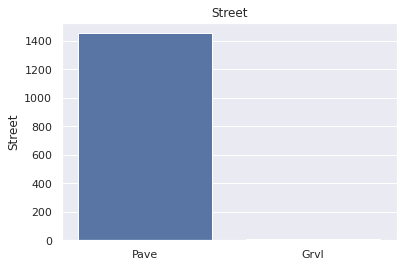

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



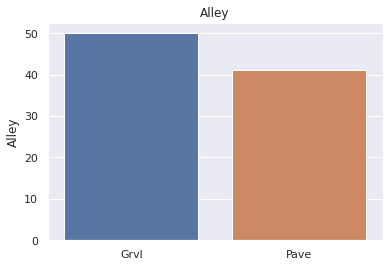

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



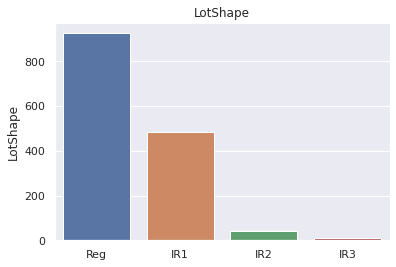

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



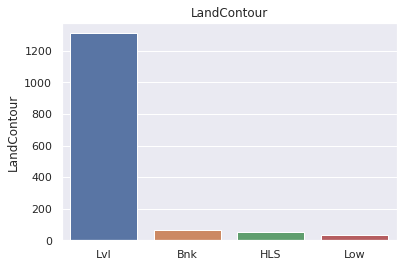

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



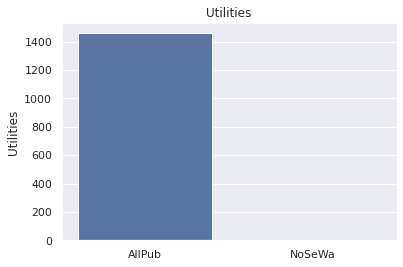

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



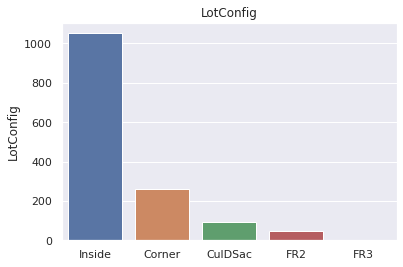

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



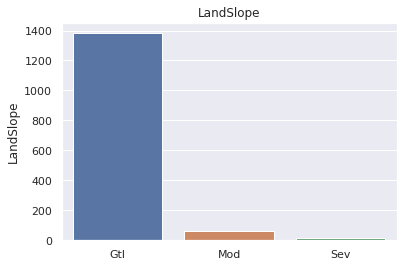

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



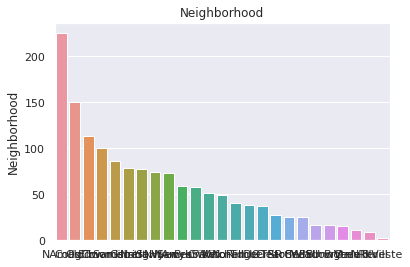

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



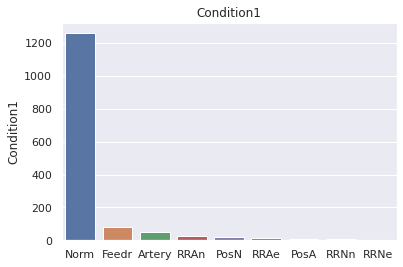

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



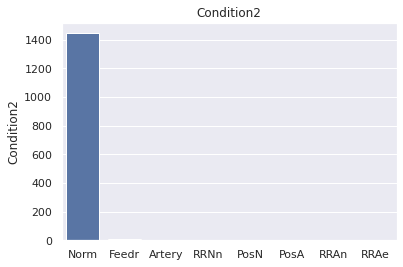

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



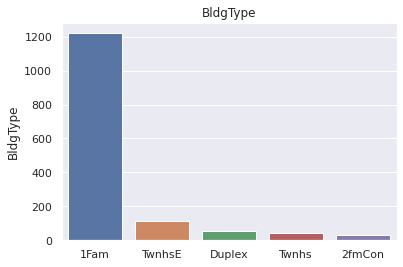

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



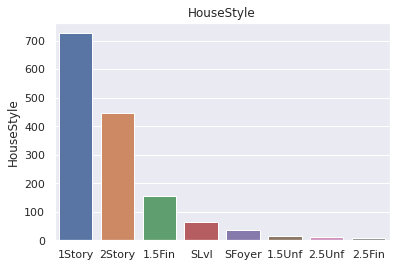

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



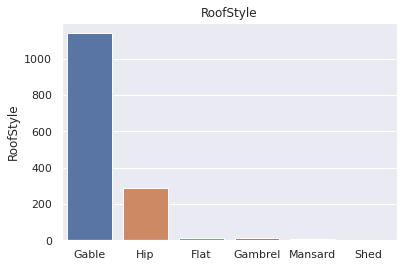

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



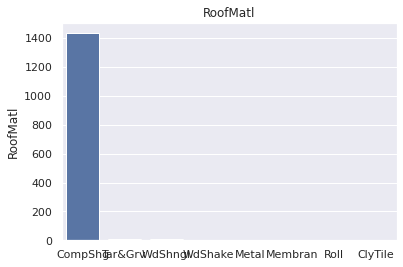

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



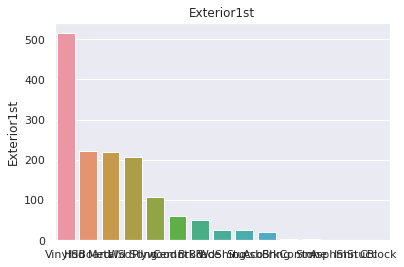

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



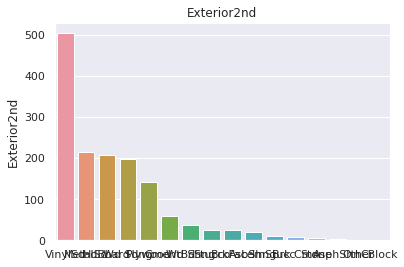

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



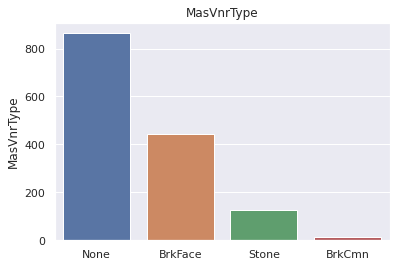

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



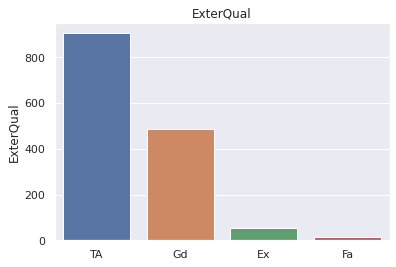

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



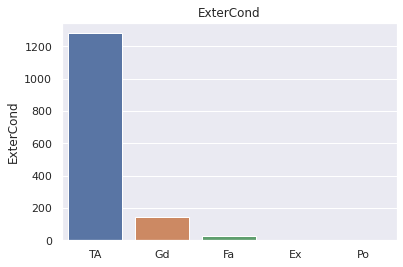

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



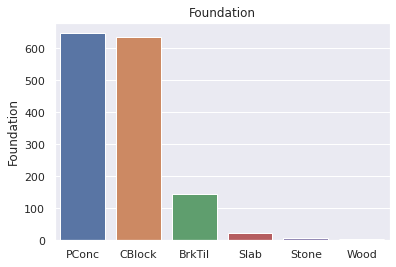

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



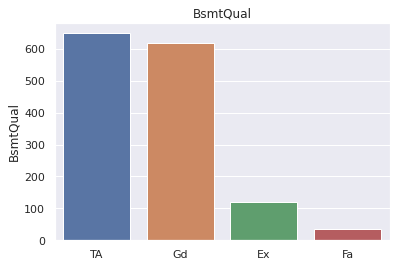

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



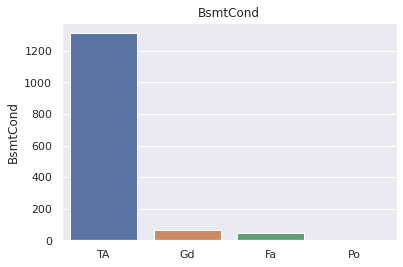

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



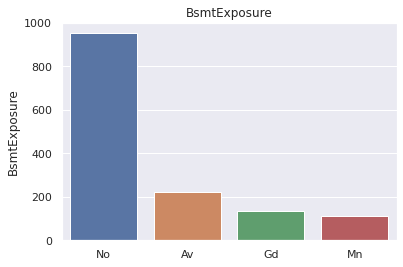

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



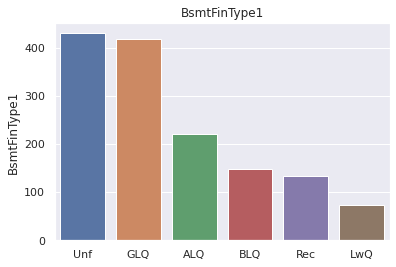

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



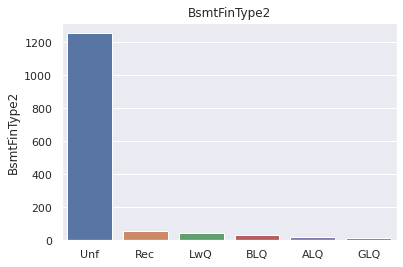

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



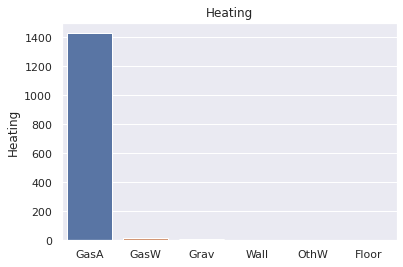

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



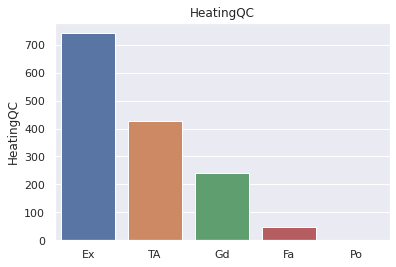

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



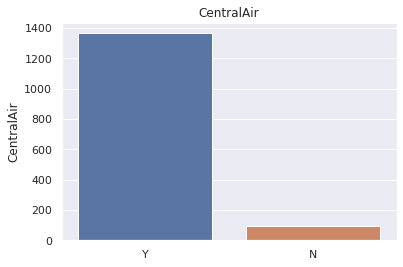

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



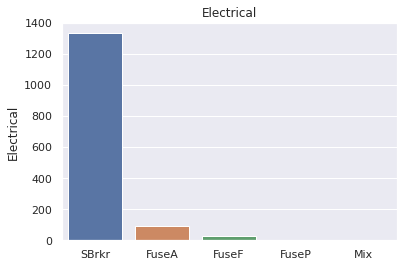

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



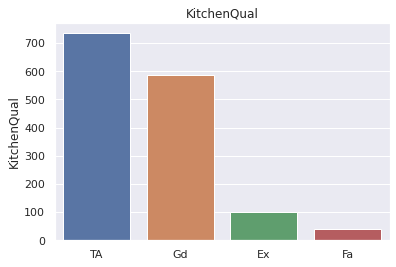

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



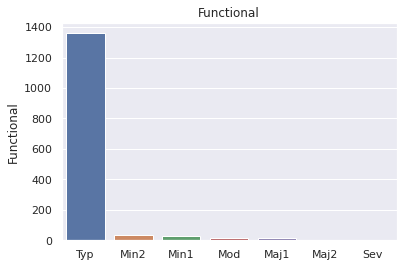

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



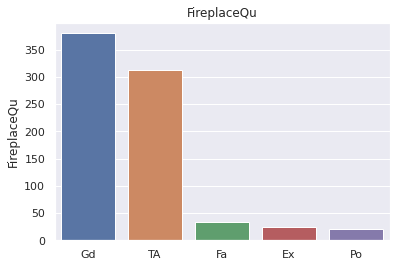

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



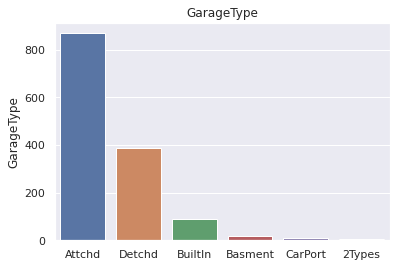

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



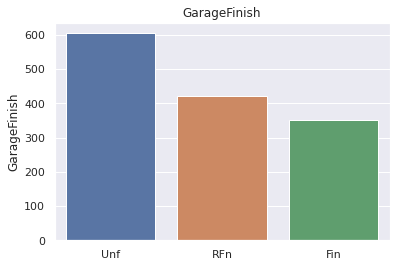

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



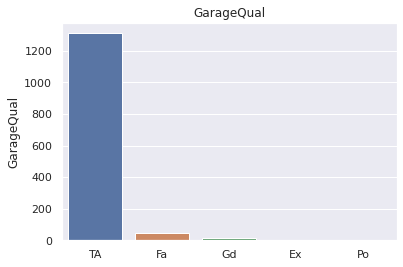

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



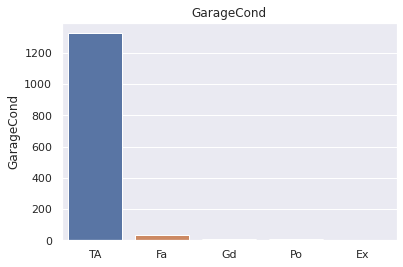

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



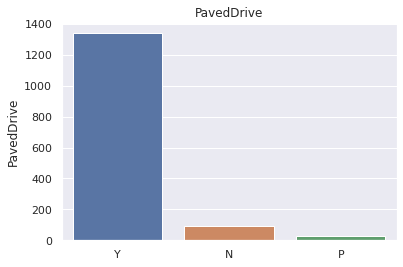

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



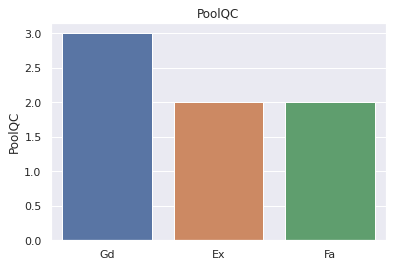

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



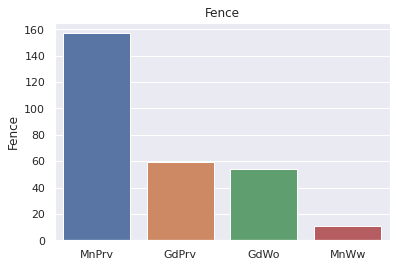

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



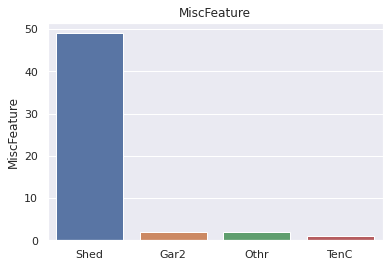

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



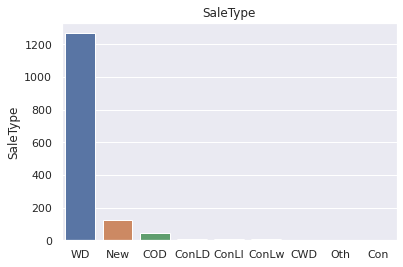

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



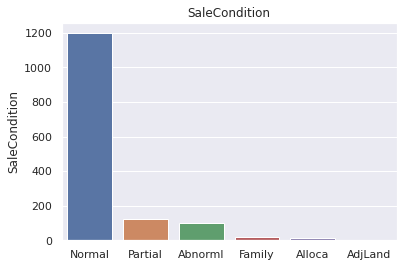

In [48]:

for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

<center><img src="https://media1.giphy.com/media/1wRulyhp5INhA8uDFv/giphy.gif?cid=ecf05e47pvio4ydlojc5nryo0qknvhhyxe0r45lwaor2eadg&rid=giphy.gif&ct=g" alt="drawing" width="200"/></center>

A lot to note down here...

* features "Street", "Utilities, "Condition2", "RoofMatl", "Heating", "Functional", "GarageQual", "Saletype" are dominated by one category and the others rarely occur. So, we can consider removing these variables

* features like "Neighborhood", "Exterior1st", "Exterior2nd" have many unique values. As if we don't have enough features already. Getting dummies for all of these won't be wise.

We will make changes some changes to these variables and also drop some of them. So, we will do feature engenieering 1st then after we will worry about encoding the features 

### Feature engenieering

Our motive is to reduce features which won't affect our target by a lot. We have 79 features to deal with.
To do this let us plan our steps:- 

* We can drop some of the features.
* Perform mathemetical operations to some columns in oder to merge them.

In [49]:
data_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Step1

In [50]:
# Lets drop the features which were discovered to be multicollinear... (One from each pair by the weigthage they carry while deciding a house's price)
multco_cols = ["GarageCars", "TotRmsAbvGrd", "1stFlrSF", "2ndFlrSF"]   # 2ndFlrSF has no significance without a first floor
raw_data = raw_data.drop(multco_cols, axis=1)

# Lets drop the categorical features which are dominated by one category
cat_drop = ["Street","Condition2", "RoofMatl", "Heating", "Functional", "GarageQual", "SaleType" ]
raw_data = raw_data.drop(cat_drop, axis=1)

# Lets drop features which seem irrelevant to me
irr_drop = ["GarageYrBlt", "MoSold"] # GarageYrBlt mostly will match to House built date and ... 
raw_data = raw_data.drop(irr_drop, axis=1) # Seriously, I think Month Sold is just there for lols. I mean how could it be relavant.

And for the test data

In [51]:

test_data = test_data.drop(multco_cols, axis=1)
test_data = test_data.drop(cat_drop, axis=1)
test_data = test_data.drop(irr_drop, axis=1) 

In [52]:
raw_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'YrSold', 'SaleCondition',
       'S

#### Step 2

In [53]:
# Remod variable which predicts if there was a renovation 0 for no and 1 for yes
raw_data['Remod'] = raw_data["YearRemodAdd"] - raw_data["YearBuilt"]
raw_data['Remod'] = raw_data['Remod'].apply(lambda x: 1 if x>0 else 0)
raw_data['Remod'].head(10)
# drop_list = ['YearRemodAdd']

0    0
1    0
2    1
3    1
4    0
5    1
6    1
7    0
8    1
9    1
Name: Remod, dtype: int64

In [54]:
# I think BsmtSF1 + BsmtSF2 + BsmtUnfSF = TotalBsmtSF
# So we can get rid of these 3 features
# drop_list = ['YearRemodAdd', 'BsmtSF1', 'BsmtSF2', 'BsmtUnfSF ' ]

In [55]:
# Making basement baths all in one
raw_data["TotalBsmtBth"] = raw_data["BsmtHalfBath"] + raw_data["BsmtFullBath"]

# Adding up the bathrooms
raw_data["TotalBth"] = raw_data["FullBath"] + raw_data["HalfBath"]

# drop_list = ['YearRemodAdd', 'BsmtSF1', 'BsmtSF2', 'BsmtUnfSF ', 'BsmtHalfBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [56]:
# combining all the porch areas into a single feature
raw_data["TotalPorchSF"] = raw_data["OpenPorchSF"] + raw_data["EnclosedPorch"] + raw_data["3SsnPorch"] + raw_data["ScreenPorch"]
# drop_list = ['YearRemodAdd', 'BsmtSF1', 'BsmtSF2', 'BsmtUnfSF ', 'BsmtHalfBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [57]:

test_data['Remod'] = test_data["YearRemodAdd"] - test_data["YearBuilt"]
test_data['Remod'] = test_data['Remod'].apply(lambda x: 1 if x>0 else 0)

test_data["TotalBsmtBth"] = test_data["BsmtHalfBath"] + test_data["BsmtFullBath"]



test_data["TotalBth"] = test_data["FullBath"] + test_data["HalfBath"]
test_data["TotalPorchSF"] = test_data["OpenPorchSF"] + test_data["EnclosedPorch"] + test_data["3SsnPorch"] + test_data["ScreenPorch"]


In [58]:
# We will now prefer to rearrange our columns 
raw_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'YrSold', 'SaleCondition',
       'S

In [59]:
new_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'Remod', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'TotalPorchSF', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'YrSold', 'SaleCondition',
       'SalePrice']

raw_data = raw_data[new_cols]
raw_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'Remod', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'TotalPorchSF', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

Modifications for the test data

In [60]:
test_new_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'Remod', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'TotalPorchSF', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'YrSold', 'SaleCondition']
test_data = test_data[test_new_cols]

In [61]:
data.shape

(1460, 81)

In [62]:
raw_data.shape

(1460, 58)

We have managed to reduce 23 columns. But don't get excited we will have to deal with  categorical values and coding them. This could cost us much more than what we have managed to reduce. Ah well let's try to deal with it.

### Dealing with categorical values

Lets see whats left in our bag

In [63]:
raw_data.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'Remod', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'TotalPorchSF', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [64]:
abc = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'Remod', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'TotalPorchSF', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice'] # Sorry for trolling

rough_df = raw_data.drop(abc, axis=1)
rough_df.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleCondition'],
      dtype='object')

Now there are some features which are given values in a rating sort of manner like Excellent, average, poor etc. So, all we have to do is to map these columns into a numerical rating like 1 for the worst and the highest number for the best. 

In [65]:
rating_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'GarageCond', 'HeatingQC', 'FireplaceQu', 'PoolQC', 'KitchenQual']
for i in rating_cols:
    raw_data[i] = raw_data[i].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5, 'None':0})
    
raw_data[rating_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,GarageCond,HeatingQC,FireplaceQu,PoolQC,KitchenQual
0,4,3,4,3,3,5,0,0,4
1,3,3,4,3,3,5,3,0,3
2,4,3,4,3,3,5,3,0,4
3,3,3,3,4,3,4,4,0,4
4,4,3,4,3,3,5,3,0,4


Modifications for test data

In [66]:
for i in rating_cols:
    test_data[i] = test_data[i].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5, 'None':0})

test_data[rating_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,GarageCond,HeatingQC,FireplaceQu,PoolQC,KitchenQual
0,3,3,3,3,3,3,0,0,3
1,3,3,3,3,3,3,0,0,4
2,3,3,4,3,3,4,3,0,3
3,3,3,3,3,3,5,4,0,4
4,4,3,4,3,3,5,0,0,4


In [67]:
raw_data.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'Remod', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'LowQualFinSF',
       'GrLivArea', 'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageCond',
       'WoodDeckSF', 'TotalPorchSF', 'PoolArea', 'PoolQC', 'MiscVal', 'YrSold',
       'SalePrice'],
      dtype='object')

Lets just get dummies for rest of the variales

In [68]:
print(raw_data.shape)
print(test_data.shape)

(1460, 58)
(1459, 57)


#### **Important**

From carefully examining the test data and training data, we can see in some features in training data there exisit unique values which aren't present in the same feature in test data and vice-versa. This will lead to an error while prediciting values from test data. So, I decided to concatinate training and test dataframes row wise so that all the dummies are created together and number of columns in both the case remain same.

In [69]:
inputs = raw_data.drop("SalePrice", axis=1)
inputs.columns == test_data.columns
train_test_combined = inputs.append(test_data)
train_test_combined = pd.concat([inputs, test_data], axis=0)
train_test_combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remod,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,TotalBsmtBth,TotalBth,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageCond,WoodDeckSF,TotalPorchSF,PoolArea,PoolQC,MiscVal,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,4.207195,9.094915,6.089072,5.564577,1971.312778,0.465228,101.396026,3.396711,3.085646,3.477561,2.918465,1051.417266,4.151764,4.694416,7.261502,0.490922,1.948270,2.860226,1.044536,3.510791,0.597122,1.768071,472.712573,2.808839,93.709832,89.249743,2.251799,0.013703,50.825968,2007.792737
std,42.517628,0.329451,0.509882,1.409947,1.113131,30.291442,0.498875,178.854579,0.580293,0.372361,0.905448,0.574950,441.120498,0.957952,46.396825,0.324750,0.545248,0.804202,0.822693,0.214462,0.662159,0.646129,1.806619,215.535686,0.712498,126.526589,107.902805,35.663946,0.242398,567.402211,1.314964
min,20.000000,3.091042,7.170888,1.000000,1.000000,1872.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,20.000000,4.110874,8.919854,5.000000,5.000000,1953.500000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,793.000000,3.000000,0.000000,7.027315,0.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,320.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
50%,50.000000,4.262680,9.154193,6.000000,5.000000,1973.000000,0.000000,0.000000,3.000000,3.000000,4.000000,3.000000,989.000000,5.000000,0.000000,7.275865,0.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,480.000000,3.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2008.000000
75%,70.000000,4.394449,9.356257,7.000000,6.000000,2001.000000,1.000000,163.500000,4.000000,3.000000,4.000000,3.000000,1302.000000,5.000000,0.000000,7.464223,1.000000,3.000000,3.000000,1.000000,4.000000,1.000000,4.000000,576.000000,3.000000,168.000000,136.000000,0.000000,0.000000,0.000000,2009.000000
max,190.000000,5.749393,12.279537,10.000000,9.000000,2010.000000,1.000000,1600.000000,5.000000,5.000000,5.000000,4.000000,6110.000000,5.000000,1064.000000,8.638171,3.000000,6.000000,8.000000,3.000000,5.000000,4.000000,5.000000,1488.000000,5.000000,1424.000000,1207.000000,800.000000,5.000000,17000.000000,2010.000000


In [70]:
train_test_combined = pd.get_dummies(train_test_combined)
train_test_combined.shape

(2919, 205)

Check wether there are any duplicated columns...

In [71]:
train_test_combined = train_test_combined.loc[:, ~train_test_combined.columns.duplicated()]
train_test_combined.shape

(2919, 205)

Seperating test and train variables again:-

In [72]:
# raw_data = pd.get_dummies(raw_data)
# raw_data.shape

data_train = train_test_combined.iloc[:1460, :]
data_test = train_test_combined.iloc[1460:, :]

print(data_train.shape)
print(data_test.shape)

(1460, 205)
(1459, 205)


<center><img src="https://media4.giphy.com/media/3Css0CBgnJIdAamowB/giphy.gif?cid=ecf05e47jxfsmhevfdpm7wd41xf63jipoi76d0101ivhver1&rid=giphy.gif&ct=g" alt="drawing" width="200"/></center>

All that for 205 columns. Gotta move on though.

### Scaling

There is a controversy for scaling dummy variables. Also, in many researches they discovered scaling dummy variables doesn't make much of a difference. So we will be scaling the rest of them.

In [73]:
from sklearn.preprocessing import StandardScaler

# raw_data_unscaled = raw_data.copy() # just if scaling doesn't work out properly later

# scaled_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'Remod', 'MasVnrArea', 'ExterQual', 'ExterCond',
#        'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'LowQualFinSF',
#        'GrLivArea', 'TotalBsmtBth', 'TotalBth', 'BedroomAbvGr', 'KitchenAbvGr',
#        'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageCond',
#        'WoodDeckSF', 'TotalPorchSF', 'PoolArea', 'PoolQC', 'MiscVal', 'YrSold']

scaler1 = StandardScaler()
scaler2 = StandardScaler()

scaler1.fit(data_train)
data_train = scaler1.transform(data_train)

scaler2.fit(data_test)
data_test = scaler2.transform(data_test)

## Modelling 

Lets put all our efforts to good use.

I would like to test how different models perform in this set. 
Spoiler - In many top voted codes linear model is found out to be most accurate. Let's find out for ourselves. The models I'll be using are :-

* Naive Bayes
* LinearRegression
* Decision Tree 
* K Nearest Neighbor 
* Random Forest
* Xtreme Gradient Boosting
* Lasso
* ElasticNet
* KernelRidge
* GradientBoostingregressor

I will crossvalidate in 5 folds just cause I think 1460 rows isn't enough to split and tested seperately

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

In [75]:
from sklearn.model_selection import train_test_split

mae = []

targets = target
# inputs = data_train.drop("SalePrice", axis=1)

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 420
x_train, x_val, y_train, y_val = train_test_split(data_train, targets, test_size=0.2, random_state=420)

#y_train = raw_data.SalePrice
#x_train = raw_data.drop("SalePrice", axis=1)


**Naive Bayes**

In [76]:

gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_vals = gnb.predict(x_val)
m1 = mean_absolute_error(y_val, pred_vals)
mae.append(m1)
m1

37814.16438356164

**Linear Regression**

In [77]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_vals = lr.predict(x_val)
m2 = mean_absolute_error(y_val, pred_vals)
mae.append(m2)
m2

20615.9365423127

**DecisionTreeClassifier**

In [78]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt.fit(x_train, y_train)
pred_vals = dt.predict(x_val)
m3 = mean_absolute_error(y_val, pred_vals)
mae.append(m3)
m3

31190.448630136987

**KNeighborsClassifier**

In [79]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_vals = knn.predict(x_val)
m4 = mean_absolute_error(y_val, pred_vals)
mae.append(m4)
m4

37706.74657534246

**RandomForestClassifier**

In [80]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train, y_train)
pred_vals = rf.predict(x_val)
m5 = mean_absolute_error(y_val, pred_vals)
mae.append(m5)
m5

23603.222602739726

**XGBRegressor**

In [81]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(x_train, y_train)
pred_vals = xgb.predict(x_val)
m6 = mean_absolute_error(y_val, pred_vals)
mae.append(m6)
m6

[19:01:31] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




14799.245023544521

In [82]:
ls = Lasso(alpha =0.0005, random_state=1)
ls.fit(x_train, y_train)
pred_vals = ls.predict(x_val)
m7 = mean_absolute_error(y_val, pred_vals)
mae.append(m7)
m7

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.226e+10, tolerance: 7.415e+08



20615.711600385017

In [83]:
el = ElasticNet(alpha=0.005, l1_ratio=.9, random_state=3)
el.fit(x_train, y_train)
pred_vals = el.predict(x_val)
m8 = mean_absolute_error(y_val, pred_vals)
mae.append(m8)
m8

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.652e+11, tolerance: 7.415e+08



20587.944472615844

In [84]:
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
krr.fit(x_train, y_train)
pred_vals = krr.predict(x_val)
m9 = mean_absolute_error(y_val, pred_vals)
mae.append(m9)
m9

15882.854226710862

In [85]:
gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gb.fit(x_train, y_train)
pred_vals = gb.predict(x_val)
m10 = mean_absolute_error(y_val, pred_vals)
mae.append(m10)
m10

13751.754339509424

In [86]:
models = ["Naive Bayes", "LinearRegression", "Decision Tree", "K Nearest Neighbor", "Random Forest", "Xtreme Gradient Boosting", "Lasso", "ElasticNet", "KernelRidge", "GradientBoostingregressor"]
table = pd.DataFrame(models, columns=["models"])
table["mean_absolute_error"] = mae
table


,models,mean_absolute_error
0,Naive Bayes,37814.164384
1,LinearRegression,20615.936542
2,Decision Tree,31190.448630
3,K Nearest Neighbor,37706.746575
4,Random Forest,23603.222603
5,Xtreme Gradient Boosting,14799.245024
6,Lasso,20615.711600
7,ElasticNet,20587.944473
8,KernelRidge,15882.854227
9,GradientBoostingregressor,13751.754340


We see that GradientBoostingregressor has the least mean squared error. Hence, we can use this model to predict the SalePrice values for our test data. 

## Submission

<center><img src="https://media2.giphy.com/media/5WIfkLiwgda1sdm11b/giphy.gif?cid=ecf05e47ucwnabgav68bgu5lyukfksorycllcbkl6vk7ue20&rid=giphy.gif&ct=g" alt="drawing" width="400"/></center>

Our model is finalized, now to submit it.

Lets first predict with our good old data_test

In [87]:

test_preds = gb.predict(data_test)
print(test_preds)

[128580.2028079  167447.71085361 193118.51469342 ... 157439.51105064
 112192.72893471 218482.18565487]


Since, the sample submission includes 'Id' we will regenerate the 'Id' option.

In [88]:
test_data['Id'] = test_id
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

Our submission is made

## References

Although, I haven't copied any part of code, I have run through some kaggle notebooks and youtube videos to fish some ideas. Here, are the following links:-

* <a href="https://www.youtube.com/watch?v=vtm35gVP8JU&list=WL&index=1&t=1672s">Youtube video</a>
* <a href="https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard">Stacked Regressions : Top 4% on LeaderBoard</a>
* <a href="https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python">Comprehensive data exploration with Python</a>